In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn import metrics

#Predict if the passenger will survive
#We need Survived column which is 1 or 0
#Classification should be the method to go for this project


#Train data is used for model to learn from it as seen data 20%
#Test data is used for  model to predict as unseen data 80%

#1. Understand and Clean the data
#2. Features Engineering (transform data to be able to for use)
    #Missing values
        #Age / Done
        #Cabin / Done
        #Embarked / Done

    #Outliers 
        #Fare / Done
    
    #Wrong data types
        #Name / Done
        #Sex / Done
        #Ticket / Done
        #Cabin / Done
        #Embarked / Done
#3. Model and predictions

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#1. Understand the data

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#2. Features Engineering

#Fill Age missing values 

train.Age = train.Age.fillna(train.Age.mean())

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#Fill Cabin missing values

train.Cabin = train.Cabin.fillna('NO Cabin')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
#Fill Embarked missing values

train.Embarked = train.Embarked.fillna('S')

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


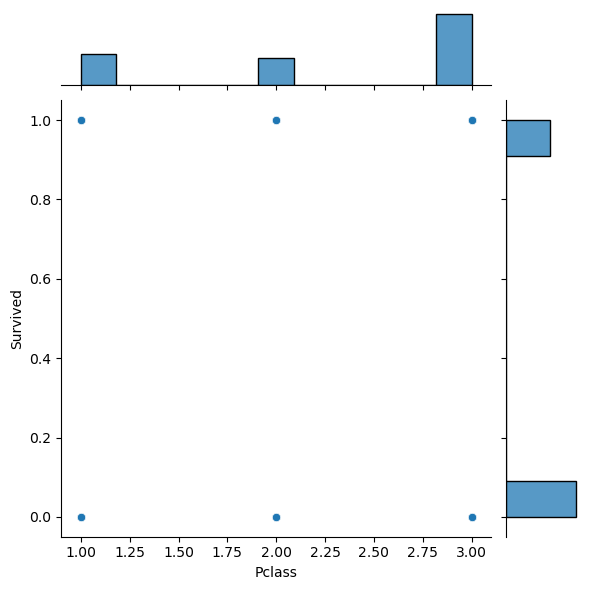

In [10]:
sns.jointplot(x='Pclass', y='Survived', data=train)

<Axes: xlabel='Pclass', ylabel='Fare'>

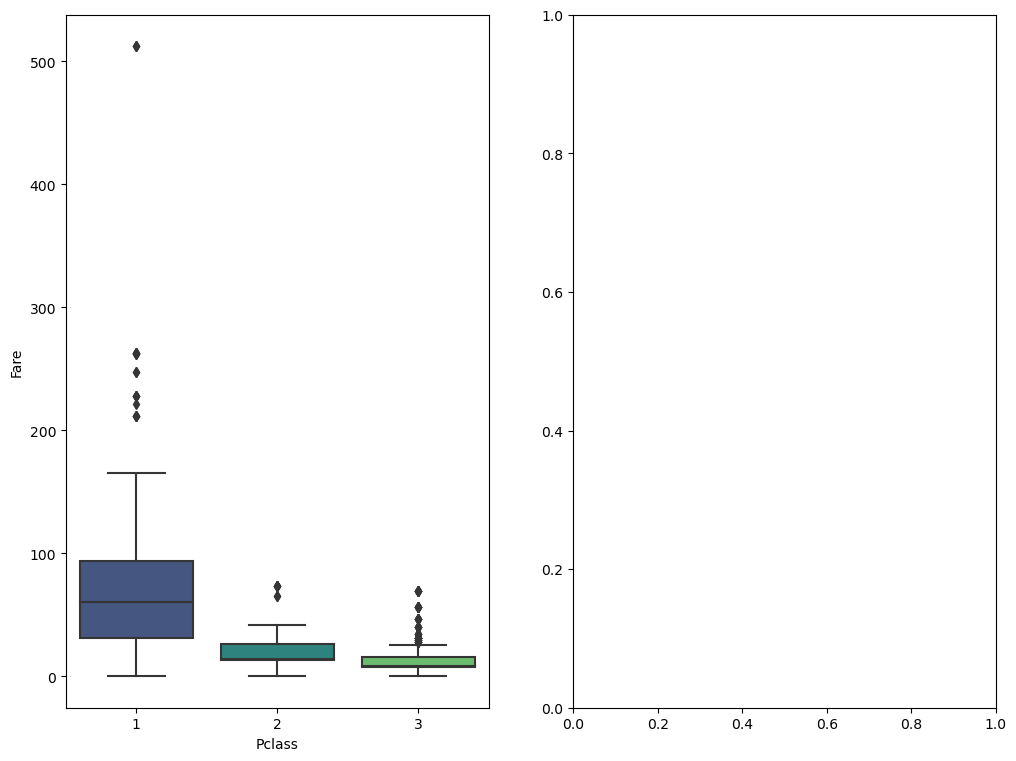

In [11]:
fig,axes = plt.subplots(1, 2,figsize=(12,9))

sns.boxplot(x='Pclass',y='Fare',data=train, palette='viridis',ax=axes[0])

In [12]:
#Change the values of outliers

train.loc[train.Fare > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NO Cabin,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [13]:
avg_fare = np.percentile(train.Fare, [99])[0]

train.Fare[(train.Fare > 500)] = avg_fare

train.loc[train.Fare > 200]

C:\Users\Millionaire\AppData\Local\Temp\ipykernel_12892\2601683592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Fare[(train.Fare > 500)] = avg_fare


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.00000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.00000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.52080,B58 B60,C
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,249.00622,NO Cabin,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.52080,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.37500,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.00000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.50000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.52500,NO Cabin,C
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.00000,C23 C25 C27,S


<Axes: >

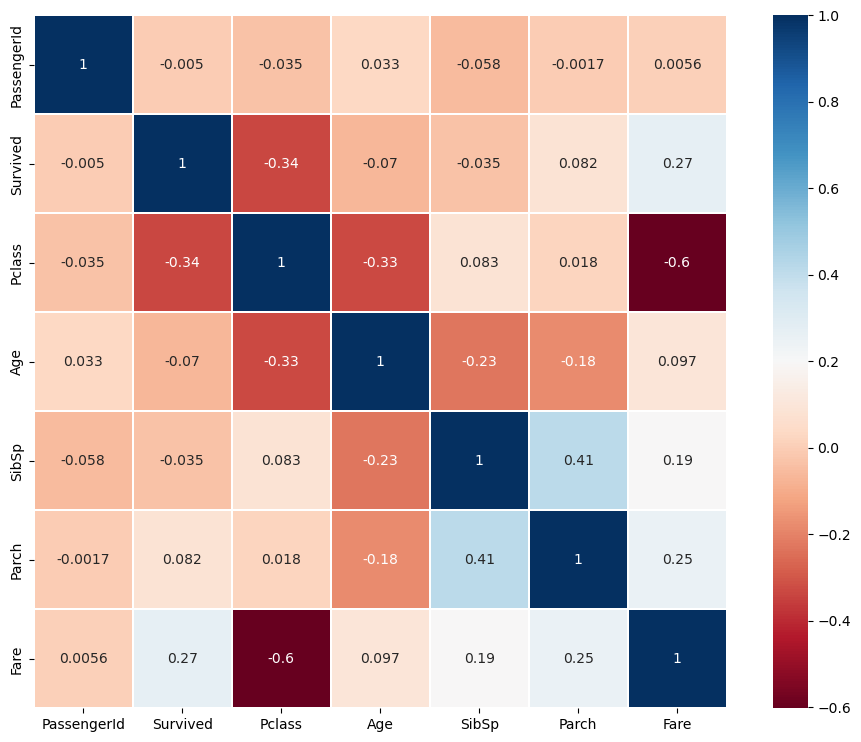

In [14]:
#Correlatin between data

plt.figure(figsize=(12,9))
sns.heatmap(
    train.select_dtypes(include=['int64', 'float64']).corr(),
    cmap=plt.cm.RdBu,
    vmax=1.0,
    linewidths=0.1,
    linecolor='white',
    square=True,
    annot=True
)

<Figure size 1200x900 with 0 Axes>

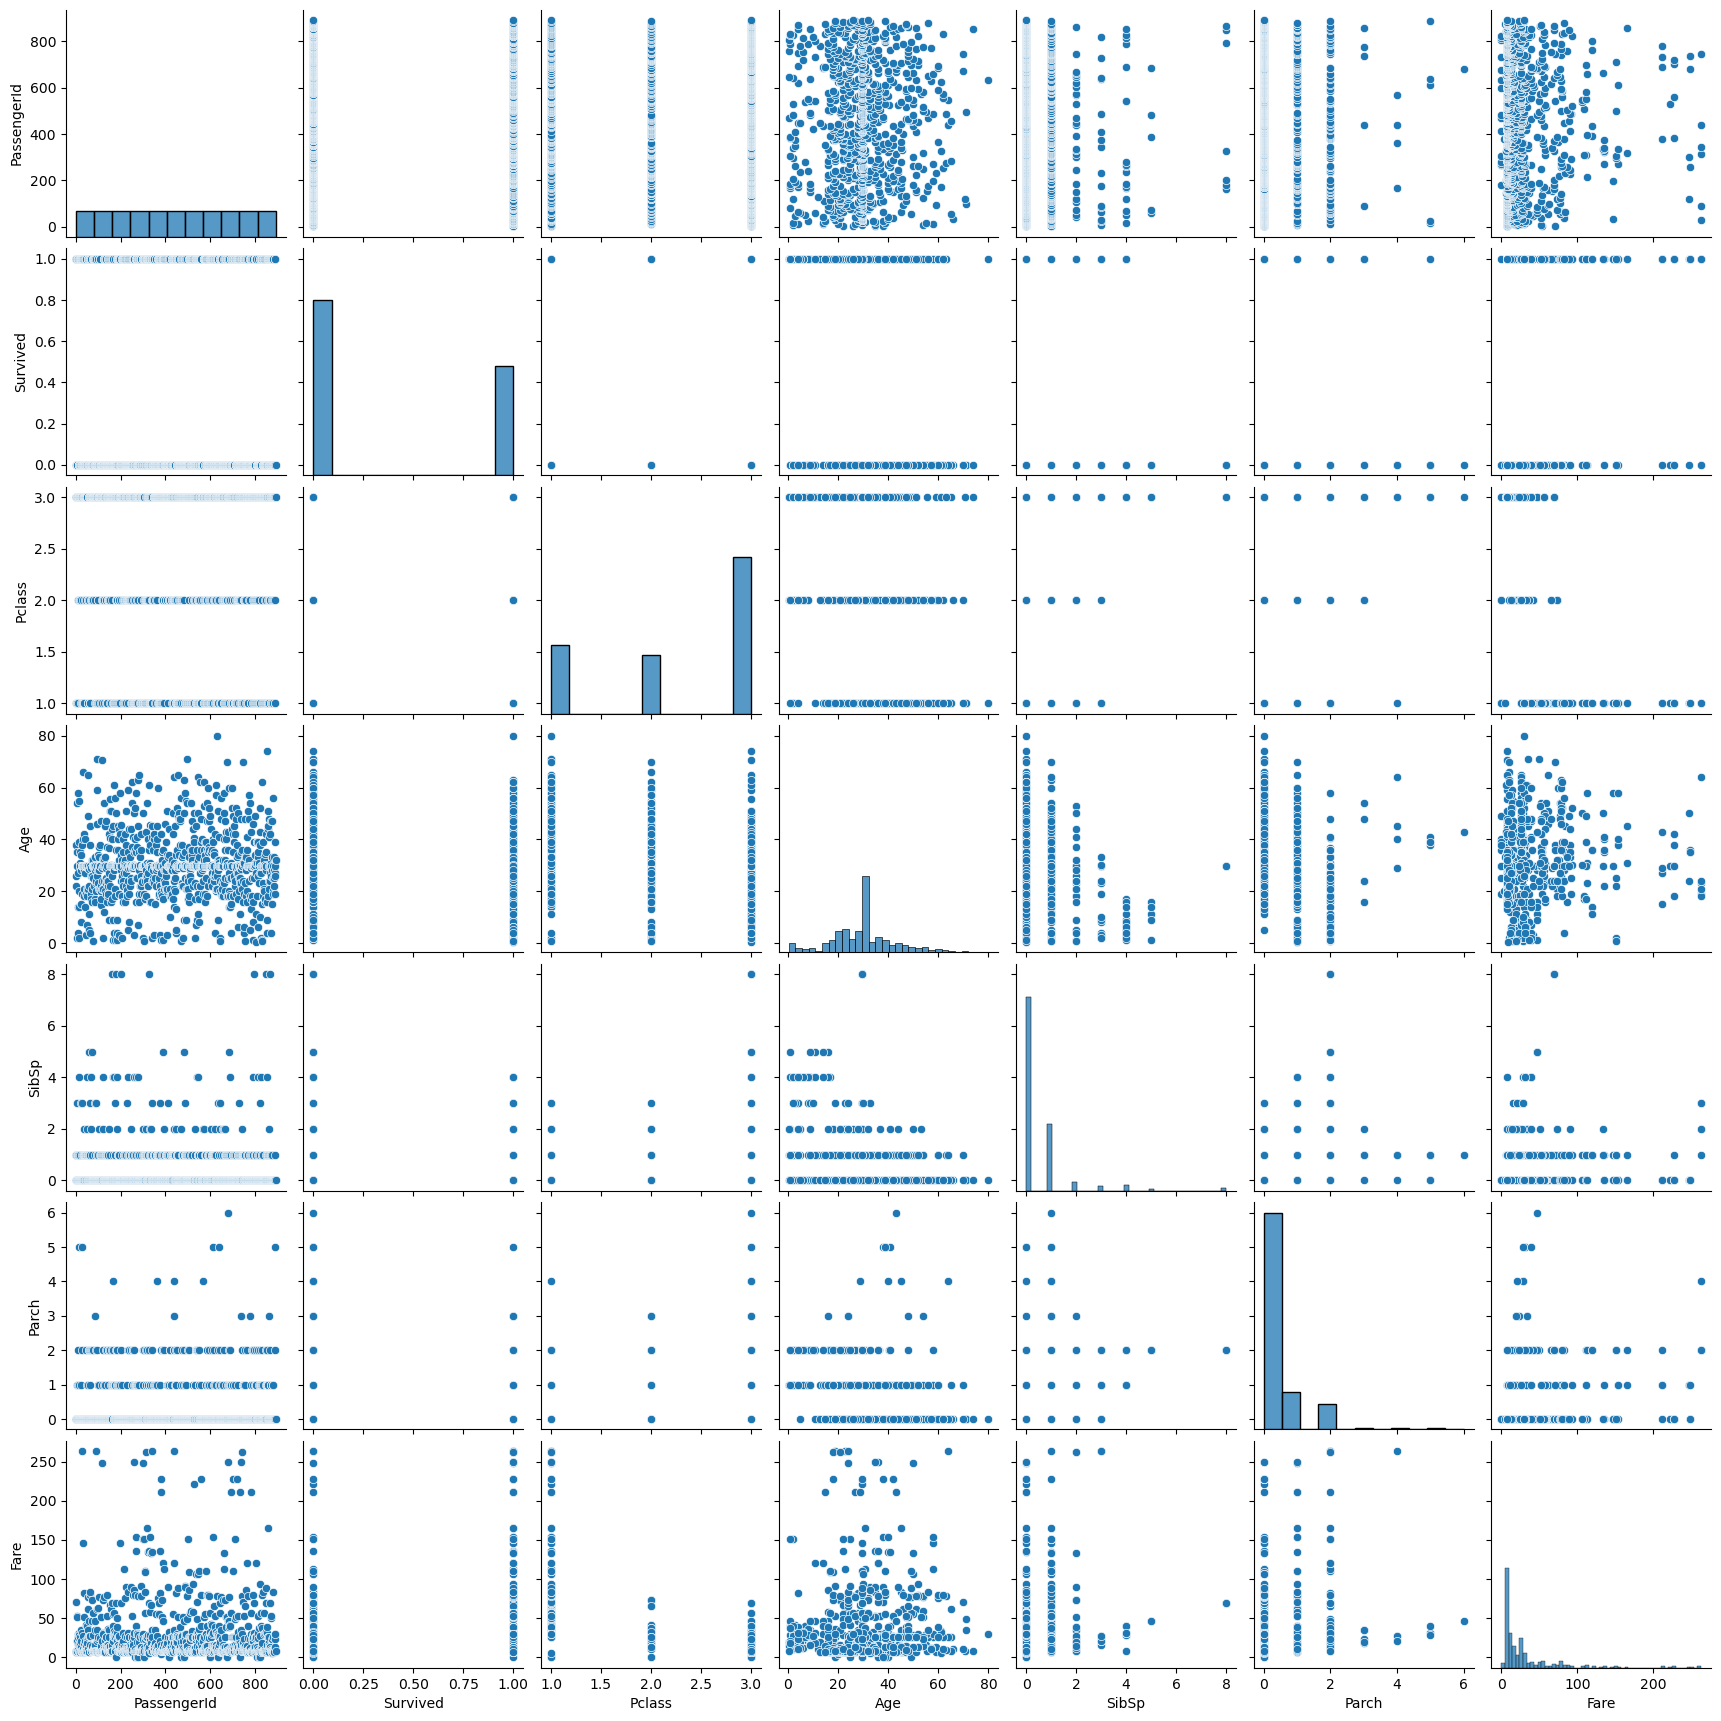

In [15]:
plt.figure(figsize=(12,9))

sns.pairplot(train.select_dtypes(include=['int64', 'float64']))

In [16]:
#Change Wrong data types using LabelEncoder

#Gender values

encoder = LabelEncoder()

train['Sex'] = encoder.fit_transform(train['Sex'])

train.Sex.value_counts()

1    577
0    314
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

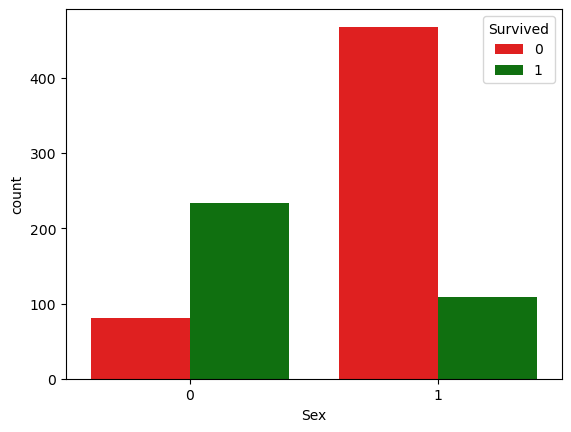

In [17]:
palette ={1:"g", 0:"r"}
sns.countplot(x='Sex',data=train,hue="Survived", palette=palette)

In [18]:
#Embarked values

train['Embarked'] = encoder.fit_transform(train['Embarked'])

train.Embarked.value_counts()

2    646
0    168
1     77
Name: Embarked, dtype: int64

In [19]:
#Cabin values

train['Room'] = (train['Cabin']
                    .str.slice(1,5).str.extract('([0-9]+)', expand=False)
                    .fillna(0)
                    .astype(int))

del train['Cabin']
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int32  
 11  Room         891 non-null    int32  
dtypes: float64(2), int32(3), int64(5), object(2)
memory usage: 73.2+ KB


In [20]:
#Ticket values

train['Ticket'] = encoder.fit_transform(train['Ticket'])

train.Ticket.value_counts()

333    7
568    7
80     7
249    6
566    6
      ..
513    1
98     1
212    1
606    1
466    1
Name: Ticket, Length: 681, dtype: int64

In [21]:
#Name doesnt predict anythin

del train['Name']

#Check the transformed data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int32  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    int32  
 10  Room         891 non-null    int32  
dtypes: float64(2), int32(4), int64(5)
memory usage: 62.8 KB


In [22]:
#3.Model and predictions

x = train.loc[:, train.columns != 'Survived'] 
y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [23]:
#Logistic Regression

lr = LogisticRegression()

lr.fit(X_train, y_train)

C:\Users\Millionaire\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
lr_prediction = lr.predict(X_train)
lr_prediction

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,

In [25]:
error_score_lr = metrics.accuracy_score(y_train, lr_prediction)
error_score_lr

0.797752808988764

In [26]:
#LinearDiscriminantAnalysis 

lda = LinearDiscriminantAnalysis()

In [27]:
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [28]:
lda_prediction = lda.predict(X_train)
lda_prediction

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [29]:
error_score_lda = metrics.accuracy_score(y_train, lda_prediction)
error_score_lda

0.8033707865168539

In [30]:
#KNeighborsClassifier

scaler = StandardScaler().fit(X_train)
X_s = scaler.transform(X_train)

params = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}
grid_search_CV = GridSearchCV(KNeighborsClassifier(), params)

In [31]:
grid_search_CV.fit(X_s, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [32]:
best_knn_model = grid_search_CV.best_estimator_

In [33]:
knn_prediction = best_knn_model.predict(X_s)
knn_prediction

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [34]:
error_score_knn = metrics.accuracy_score(y_train, knn_prediction)
error_score_knn

0.8384831460674157

In [35]:
scaler = StandardScaler().fit(X_test)
X_test_s = scaler.transform(X_test)

grid_search_CV.fit(X_test_s, y_test)

knn_prediction_train = best_knn_model.predict(X_test_s)

error_score_knn_train = metrics.accuracy_score(y_test, knn_prediction_train)
error_score_knn_train

0.8324022346368715